This notebook is particularly designed for Youtube Academic Projects Series by Spartificial Innovations Pvt Ltd. However, anyone is allowed to use it, who is interested in understanding applications of Machine Learning through real world projects.
Please contact team@spartificial.com or visit https://spartificial.com/ to know more.

Entire workflow and all the environmental parameters, facts & their estimated values, threshold, and method of calculations are considered here from *source: http://dx.doi.org/10.1016/j.renene.2014.05.037* 

# <center> Solar Power Potential Mapping in India using Remote Sensing

---

**Project ID: PVPDA-1122**      

**Project Name: India's PV power potential data analysis**

---

<center> <img src = 'https://www.earthdata.nasa.gov/s3fs-public/2022-02/Air-Quality-Transparent-Blue.gif?VersionId=z3k6nWjVZXyNXN30iMu4GZnVDBVqHYZ0' width = 55%>

**<u>Problem Statement:-</u>**        
Technical Concentrating Solar Power (CSP) and Centralized Solar Photovoltaic Potential (SPV) Mapping of India through Solar Irradiance and Spatial Data

**<u>What is covered here:-<u>**

Some terms used in solar power potential mapping

Data used for this project

Workflow of the poject

Data analysis

Tasks for exercise

**<u>Terminologies:-</u>**
- **Solar Irradiance** represents the power from the sun that reaches a surface per unit area. Solar irradiance is measured in kWh/m2/day.
- **Direct Irradiance** is the part of the solar irradiance that directly reaches a surface. 
- **Diffuse Irradiance** is the part that is scattered by the atmosphere
- **Global Irradiance** is the sum of both diffuse and direct components reaching the same surface.
- **Solar energy potential** is the amount of solar energy we could utilize
- **Photovoltaic (PV)** is a solar technology that converts sunlight into electrical energy with photovoltaic cells (semiconducting materials)

**<u>Solar radiation components striking on the ground and on the photovoltaic module:-</u>**
![](https://drive.google.com/uc?export=view&id=1yMjhNwZMvKRnx9pKZ1cBaOtXkyUmz_UW)

*Image Source: https://doi.org/10.1016/B978-0-12-817061-8.00003-8*

- **Solar PV (SPV)** directly converts sunlight or solar radiation into electricity without any interference of heat engine.
- **Concentrating Solar Power (CSP)** technologies only use direct normal component of sunlight intensity. 
  - Heat generated is transformed first into mechanical energy and then into electricity.
- **Direct Normal Irradiance (DNI)** is solar radiation that comes in a straight line from the direction of the sun at its current position in the sky.
- **Global Horizontal Irradiation (GHI)** is the total amount of shortwave terrestrial irradiance received by a surface horizontal to the ground.
- **Digital elevation model (DEM)** is a representation of the bare ground (bare earth) topographic surface of the Earth. 
  - Excluding trees, buildings, and any other surface objects.
- **Geographical Information System (GIS)** is a spatial system that creates, manages, analyzes, and maps all types of data. 
  - It connects data to a map, integrating location data (where things are) with all types of descriptive information (what things are like there). 
- **Remote Sensing (RS)** is the process of detecting and monitoring the physical characteristics of an area by measuring its reflected and emitted radiation at a distance (typically from satellite or aircraft).

**<u>The required data:-</u>**      
Digital elevation model (DEM), Global horizontal irradiance (GHI), Direct normal irradiance (DNI)

**Given environmental parameters:**

•	**h=8**=Number of sunshine hours in a day    
•	**Ai=Area where the slope is less than or equal to 2.1% of the average slope**=Suitable area    
•	**I=GHI after applying threshold for SPV and DNI after applying threshold for CSP**=Insolation    
•	**Gi=Ai x I/h**=Geographical Potential is the land occupancy related to the efficiency of the solar energy conversion in electricity
and to the PV system characteristics    
•	**Nm=12%**=Conversion efficiency depends on the type of PV cells and module temperature    
•	**Pr=0.75**=Performance ratio is defined as the ratio of the on-field performance of the system to its performance in standard test conditions    
•	**L=5**=Land-use efficiency is the product of land-use factor and solar to electric conversion efficiency. *The land-use factor is the proportion of area covered by the CSP collector system with respect to the total required land surface. Solar-to-electric conversion efficiency refers to the amount of solar irradiation incident on the receiver of a CSP system that can be transformed into net electricity supplied to the grid*.    
•	**Ei=Technical solar power potential= Gi x Nm x Pr for centralized SPV and Gi x L for CSP**


**<u>Workflow of the project:-</u>**

![](https://drive.google.com/uc?export=view&id=1LLuHYLXaSnAXfySUxPF3NqSdlpbAOuXu)

**Steps followed for data analysis of this task:**

Data analysis here can be divided into three sections:    
•	Obtaining suitable area with elevation data    
•	Technical SPV potential mapping with GHI data    
•	Technical CSP potential mapping with DNI data



## Adding Dataset to your Google Drive
1. Go to this folder which contains the [data to process](https://drive.google.com/drive/folders/1vRtYTvGqbhvtEN8xrv3tpn65nYrDygqy?usp=share_link).
2. Download that folder to your system.
3. Open your Google Drive and upload this folder there.
4. Make sure to change the links used in the code cells below depending on how you want to use it.
5. Resultant image from any step will by default save below the sample_data folder of your drive (see it in the left side of your page). So, here we have set the same path for calling them in the code which do not need to change.
6. But remember, here data are stored temporarily which can be lost if the page get refreshed.
7. To prevent loosing the output data, click on the particular output and drag it to your drive folder for permanent saving it and then change its path in the code for calling it.

In [ ]:
# Mount Google Drive to use the data directly from the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' Richdem is a set of digital elevation model (DEM) hydrologic analysis tools'''
!pip install richdem   # For processing of elevation data

'''Tifftools provides a library and a command line program for manipulating TIFF files'''
!pip install tifftools # For manupulating tiff data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 329 kB 4.9 MB/s 
  Created wheel for richdem: filename=richdem-0.3.4-cp38-cp38-linux_x86_64.whl size=5315773 sha256=8cf247c2c60d5e5374eab98fb1ebf1d5ac3a9d67e317f9d28dedb622821403ff
  Stored in directory: /root/.cache/pip/wheels/9f/9c/61/8da642da1b65cbf887fa5d335778dfcefe22fba629e6b055d4
Successfully built richdem
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.0 MB/s 
  Created wheel for tifftools: filename=tifftools-1.3.6-py3-none-any.whl size=53630 sha256=b56affd0b7a2e2d47e823143d121df48552564e0f3f306bb79ae1ee720a32d79
  Stored in directory: /root/.cache/pip/wheels/d3/df/10/3014954f4423c5d0b4a79d01f4bc20b28b6c635fd73552631e
Successfully built tifftools


In [ ]:
# Importing all the necessary libraries for this project

import matplotlib.pyplot as plt
import richdem as rd
import tifftools
import numpy as np

## Getting the areas where slope is less than or equal to 2.1%.

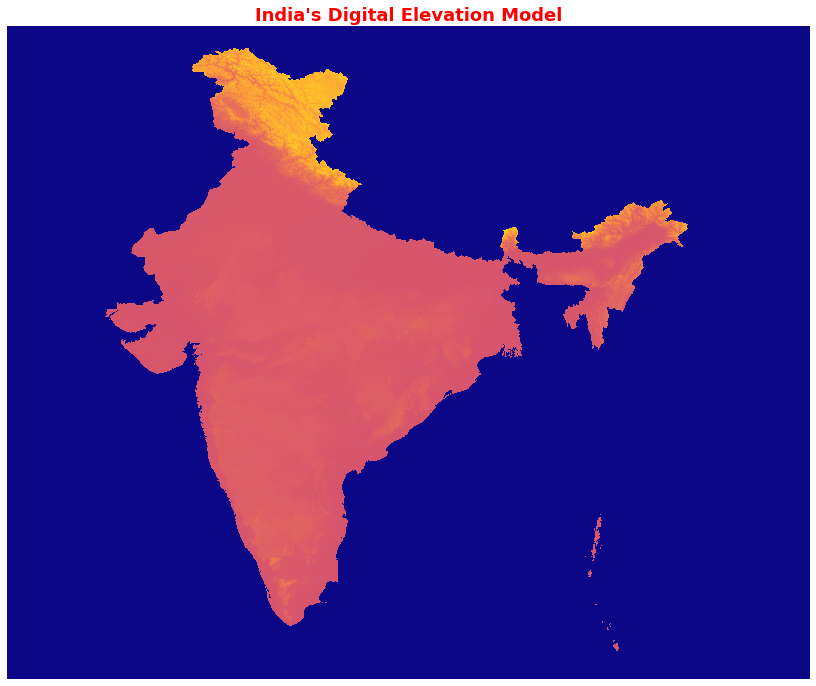

In [ ]:
'''Opening DEM data'''

# Varialble for the path of dataset india_dem
path  = "/content/drive/MyDrive/Data to process/india_dem.tif"

# Importing the dem data with richdem and gdal
dem = rd.LoadGDAL(path) 

# Plotting the data
plt.figure(figsize = (15,12))
plt.title("India's Digital Elevation Model", fontsize = 18, color = 'r', weight = 'bold') 
plt.imshow(dem, interpolation='none', cmap='plasma') 
plt.axis('off')
plt.show()

## Transforming DEM data into slope data and saving it

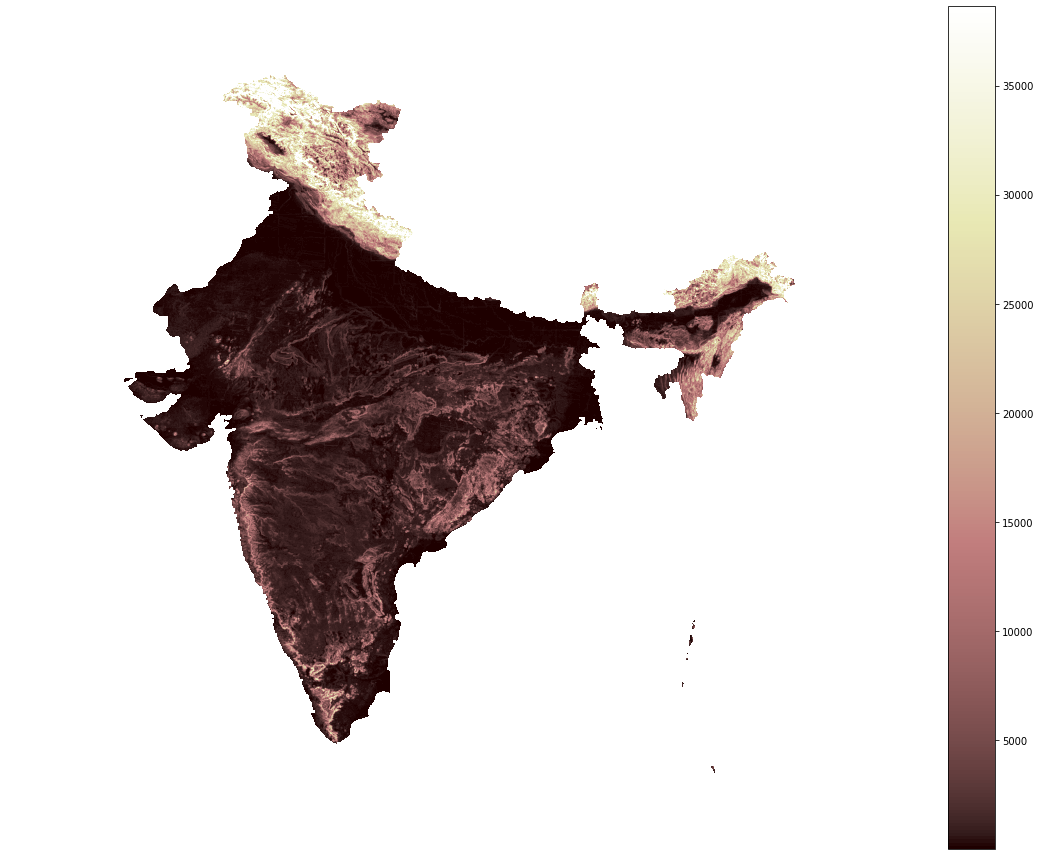

In [ ]:
# Reading the DEM attribute to transform it into terrin slope
slope = rd.TerrainAttribute(dem, attrib='slope_riserun') 

# Displaying the slope
rd.rdShow(slope, axes=False, cmap='pink',figsize=(15,12)) 

# Saving the slope image into tiff format
rd.SaveGDAL("slope_riserun.tif", slope) 

In [ ]:
'''Calculating threshold for slope to be included'''

# Converting slope image to array
slope_array = np.asarray(slope)

# Calculating average slope
avg=np.average(slope_array)

# Calculating the threshold as 2.1% of average slope
threshold=avg*2.1/100 
print(f"Threshold as 2.1% of avg slop = {round(threshold)} (3sf)")

Threshold as 2.1% of avg slop = -143 (3sf)


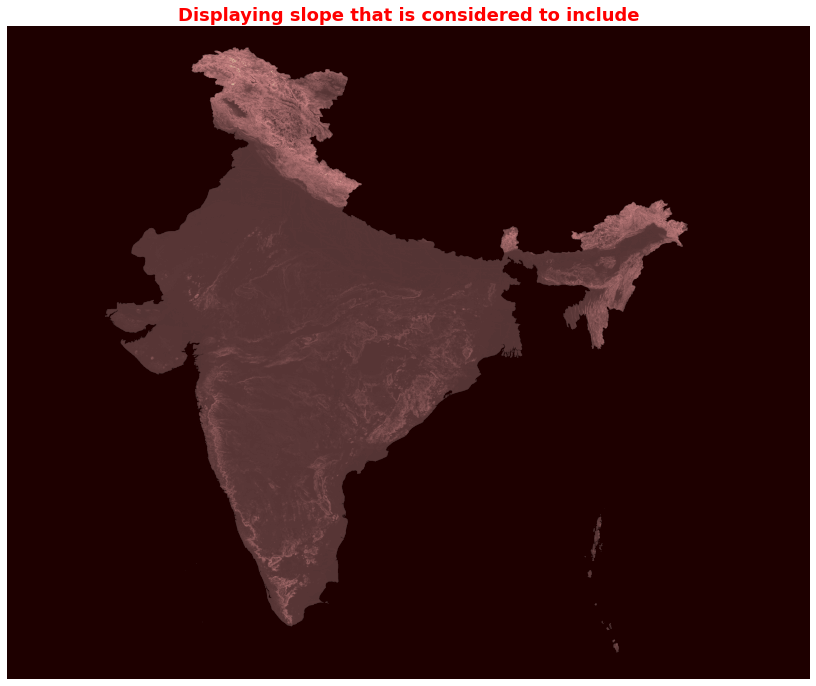

In [ ]:
# Retreiving the slope to be included for csp and spv
slopeexcluded = slope > threshold
slopeincluded = slope - slopeexcluded

# Plot
plt.figure(figsize=(15,12))
plt.title("Displaying slope that is considered to include", fontsize = 18, color = 'r', weight = 'bold')
plt.imshow(slopeincluded, cmap = "pink"), plt.axis('off') 
plt.show()

# Saving the obtained image
rd.SaveGDAL("slopeincluded.tif", slopeincluded)

## Getting the areas where GHI is greater than or equal to 4.0 kWh/m2/day

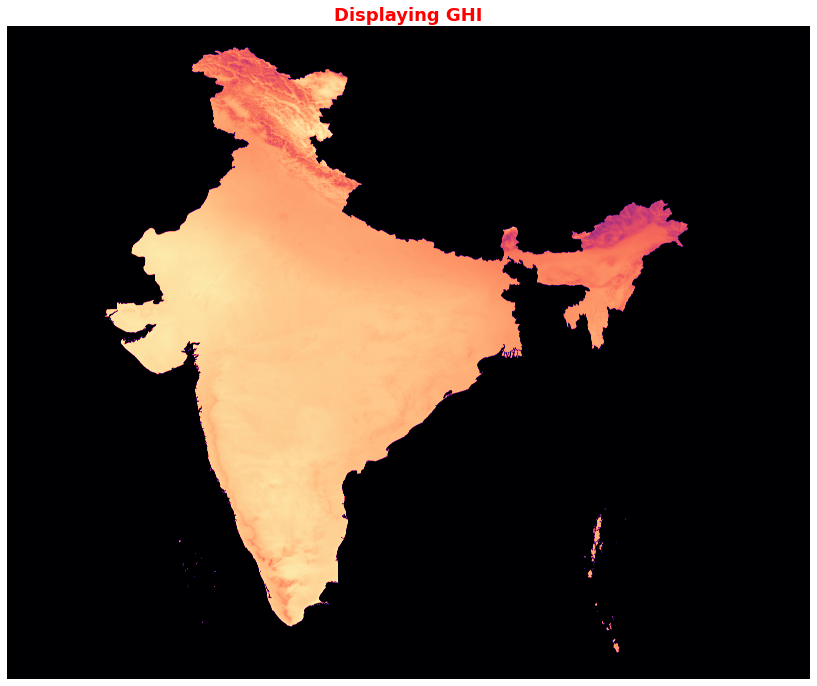

In [ ]:
# Variable for path of dataset GHI
path1  = "/content/drive/MyDrive/Data to process/ghi.tif"

# Plot
GHI=rd.LoadGDAL(path1)
plt.figure(figsize=(15,12))
plt.title('Displaying GHI', fontsize = 18, color = 'r', weight = 'bold')
plt.axis('off')
plt.imshow(GHI, cmap = "magma")
plt.show()

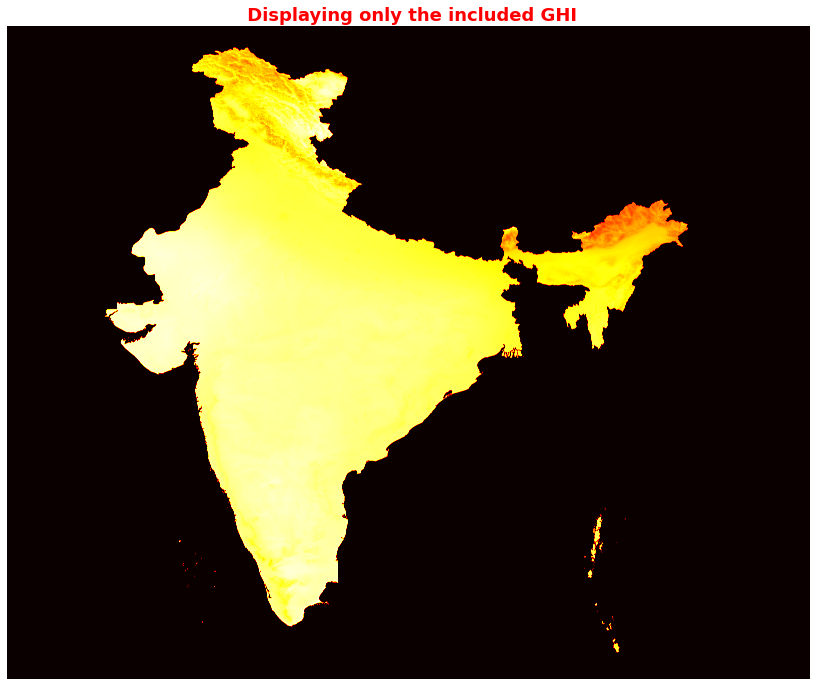

In [ ]:
# Threshold for GHI to include
threshold=4

# GHI less than threshold is excluded from the calculation
ghiexcluded = GHI < threshold

# Calculating GHI after the exclusion and displaying it
ghi_included=GHI-ghiexcluded
plt.figure(figsize = (15,12))
plt.title(f" Displaying only the included GHI", fontsize = 18, color = 'red', weight = 'bold')
plt.imshow(ghi_included, cmap = "hot"), plt.axis('off')
plt.show()

In [ ]:
# Saving included ghi in tiff format
rd.SaveGDAL("ghi_included.tif", ghi_included)

## Geographical potential for SPV

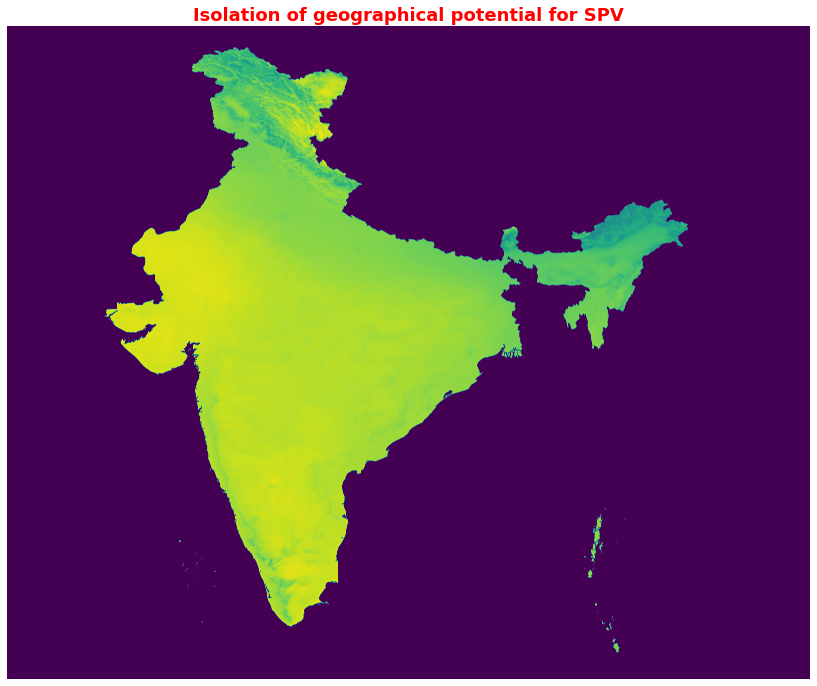

In [ ]:
# GHI is the insolation layer for SPV
I_ghi = '/content/ghi_included.tif'
insolation_ghi = rd.LoadGDAL(I_ghi)

# Number of sunshine hours in a day
h = 8

# Calculating, displaying and saving isolation of geographical potential for SPV
G1=insolation_ghi/h 
plt.figure(figsize=(15,12))
plt.title("Isolation of geographical potential for SPV", fontsize = 18, color = 'red', weight = 'bold')
plt.axis('off'), plt.imshow(G1)
plt.show()
rd.SaveGDAL("G1.tif", G1)

In [ ]:
# Overlaying included slope area and isolation to get final Geographical potential for spv
input1 = tifftools.read_tiff('/content/G1.tif')
input2 = tifftools.read_tiff('/content/slopeincluded.tif')

# Add input2 to input1
input1['ifds'].extend(input2['ifds'])

# Saving overlayed image
tifftools.write_tiff(input1, 'Gi_ghi.tif')

## SPV Potential areas

In [ ]:
# Calling geographical potential for SPV
G = "/content/Gi_ghi.tif"
geographical_potential_ghi = rd.LoadGDAL(G)

# Conversion efficiency for PV modules which depends on type of PV cells and module temperature
Nm = 12/100

# Performance ratio of PV system which is the ratio of field performance of the system to its performance in standard test condition
Pr = 0.75 

# Calculating technical potential of SPV
Ei_spv=geographical_potential_ghi*Nm*Pr 

In [ ]:
# Saving technical potential of SPV
rd.SaveGDAL("Ei_spv.tif", Ei_spv)

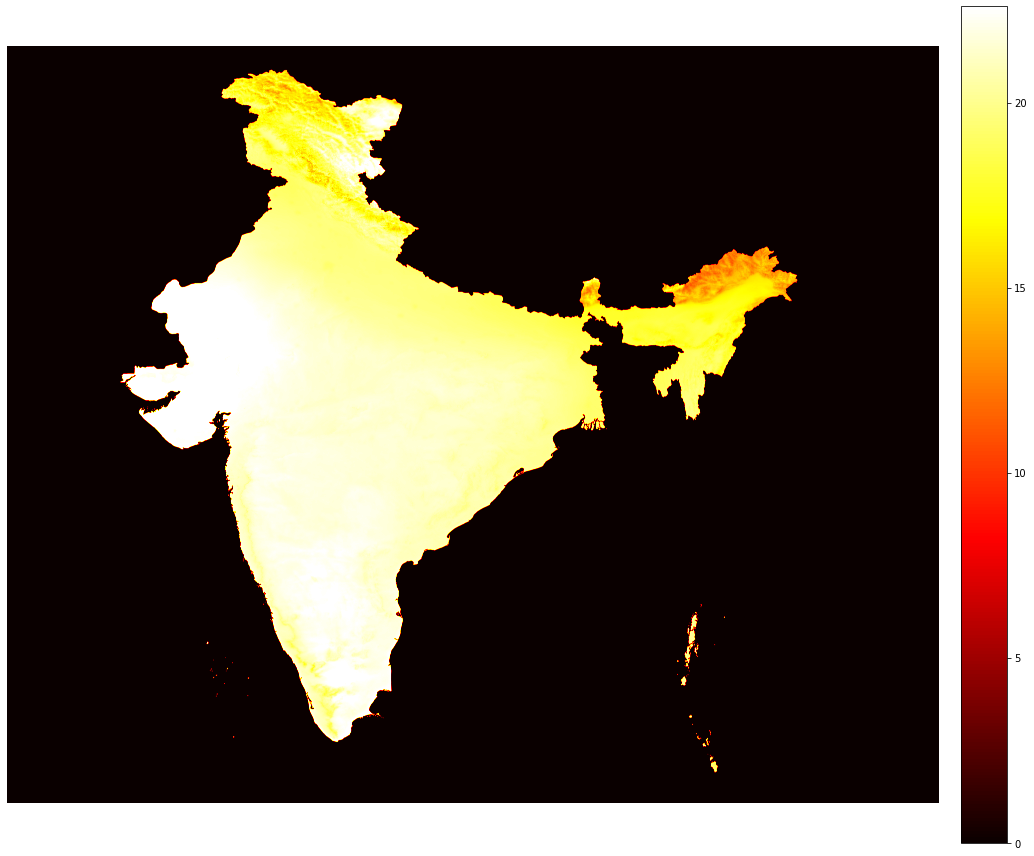

In [ ]:
# Displaying final data of technical spv potential
spv=rd.LoadGDAL('/content/Ei_spv.tif')
rd.rdShow(spv, axes=False, cmap='hot', figsize=(15,12))
plt.show()

## Getting the areas where DNI is greater than or equal to 5.47 kWh/m2/day

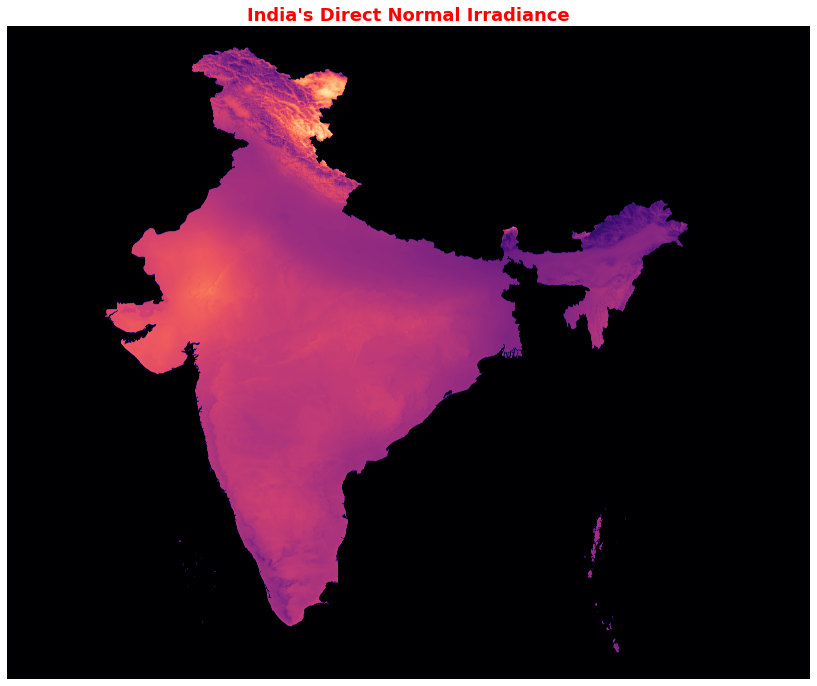

In [ ]:
# Variable for path of dataset DNI
path2  = "/content/drive/MyDrive/Data to process/dni.tif"

# Calling DNI
DNI = rd.LoadGDAL(path2)

# Displaying
plt.figure(figsize = (15,12))
plt.title("India's Direct Normal Irradiance", fontsize = 18, color = 'r', weight = 'bold')
plt.imshow(DNI, cmap = "magma"), plt.axis('off')
plt.show()

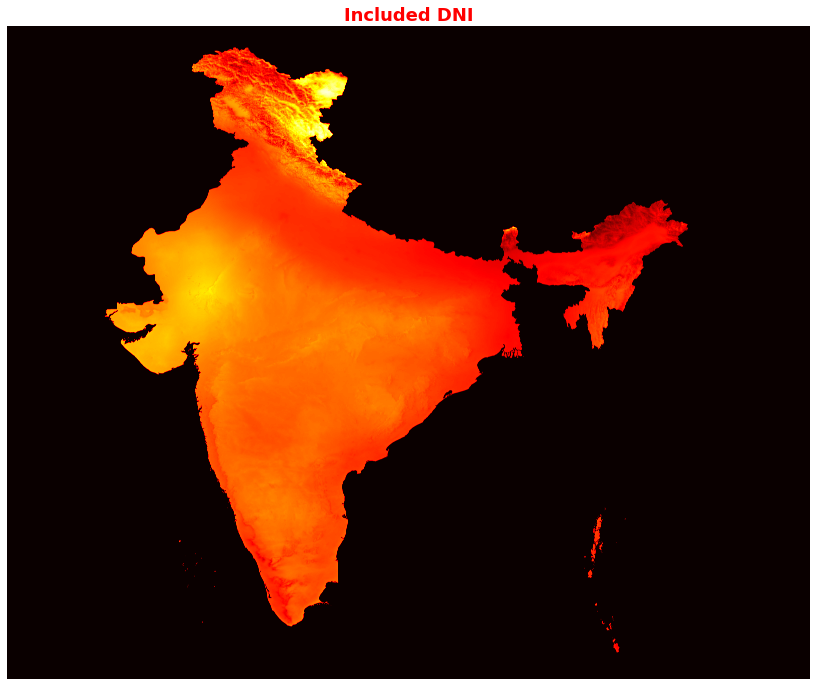

In [ ]:
# Threshold for dni to include
threshold=5.47

# DNI less than threshold is excluded from the calculation
dniexcluded = DNI < threshold
dni_included=DNI-dniexcluded

# Plot
plt.figure(figsize=(15,12))
plt.title("Included DNI", fontsize = 18, color = 'r', weight = 'bold')
plt.imshow(dni_included, cmap = "hot"), plt.axis('off')
plt.show()

# Saving included DNI in tiff format
rd.SaveGDAL("dni_included.tif", dni_included)

## Geographical potential for CSP

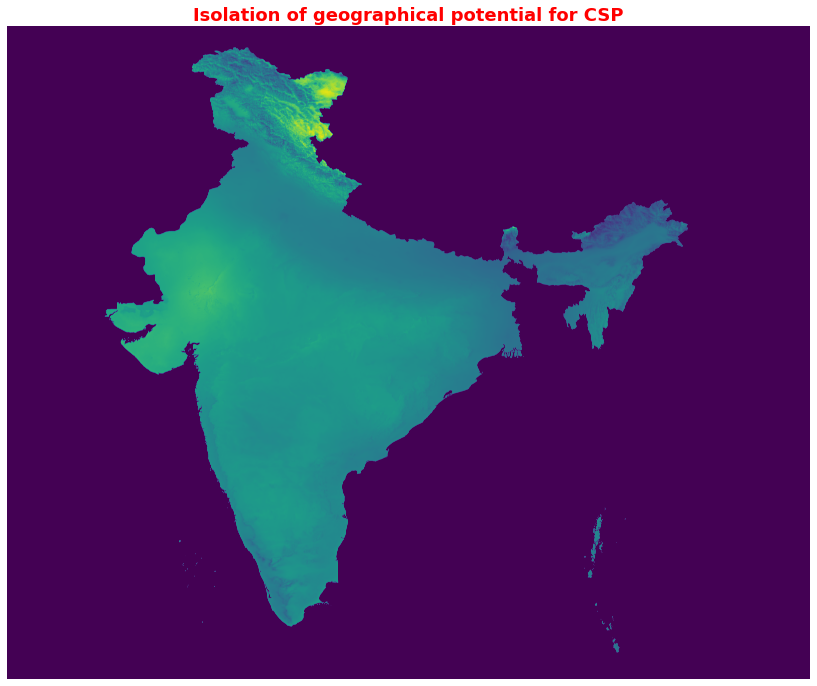

In [ ]:
# DNI is the insolation layer for csp
I_dni="/content/dni_included.tif"
insolation_dni = rd.LoadGDAL(I_dni)

# Number of sunshine hours in a day
h = 8 

# Calculating, displaying and saving isolation of Geographical potential for CSP
G2=insolation_dni/h 
plt.figure(figsize=(15,12))
plt.title("Isolation of geographical potential for CSP", fontsize = 18, color = 'red', weight = 'bold')
plt.axis('off'), plt.imshow(G2)
plt.show()
rd.SaveGDAL("G2.tif", G2)

In [ ]:
# Overlaying included slope area and isolation to get final Geographical potential for CSP
input3 = tifftools.read_tiff('/content/G2.tif')
input4 = tifftools.read_tiff('/content/slopeincluded.tif')

# Add input4 to input3
input3['ifds'].extend(input4['ifds'])

# Saving overlayed image
tifftools.write_tiff(input3, 'Gi_dni.tif')

## CSP Potential areas

In [ ]:
# Calling geographical potential for CSP
D="/content/Gi_dni.tif"
geographical_potential_dni = rd.LoadGDAL(D)

# Land-use efficiency which is the product of land-use factor and solar to electric conversion efficiency
L=5 

# Technical potential of CSP
Ei_csp=geographical_potential_dni*L 

In [ ]:
# Saving technical potential of CSP
rd.SaveGDAL("Ei_csp.tif", Ei_csp)

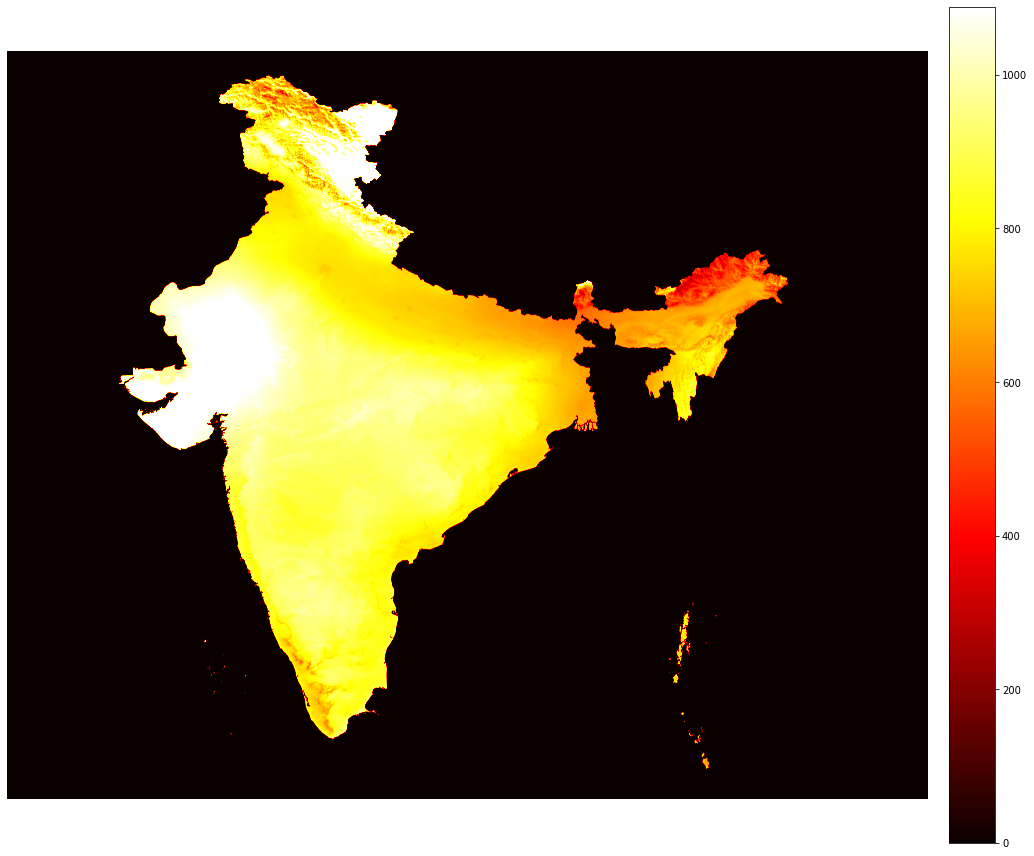

In [ ]:
# Displaying final data of technical csp potential
csp=rd.LoadGDAL('/content/Ei_csp.tif')
rd.rdShow(csp, axes=False, cmap='hot', figsize=(15,12))
plt.show()

**Summary**

- Terminologies related to the project

- Breakdown of the sunlight on earth's surface

- Solar power potential

- Technology to convert sun's energy to electricity

- Aim of this project

- Data required

- Necessary environmental parameters and PV system characteristics

- Threshold and values for all data, environmental parameters and PV system characteristics

- Workflow for data analysis in this project with elaborated steps and expressions

- Finally, data analysis for SPV and CSP potential mapping of India

## Task for you (<mark>Chance to earn a certificate if you complete the tasks give below</mark>)

- **TASK 1**

Estimate the SPV and CSP potential of India by keeping Pr=0.66 and L=3.5 while every other parameters same.

- **TASK 2**

Estimate the SPV and CSP potential for Rajasthan by keeping Pr=0.66, L=3.5, GHI greater than or equal to 5.0 kW/m2/day, and DNI greater than or equal to 4.0 kW/m2/day while every other parameters same. GHI, DNI, and DEM data of Rajasthan are given in the same folder.

[data to process](https://drive.google.com/drive/folders/1vRtYTvGqbhvtEN8xrv3tpn65nYrDygqy?usp=share_link)

- **TASK 3**

Why DNI is used to obtain CSP potential and GHI is used for SPV potential? Explain reasons.


**Submit your solution notebook using [this](https://forms.gle/gVW3Spv148dMzamo9) form. All the best!**


---
# <center> THE END